In [8]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [9]:
pkg = mp.jupyter.open_package()
roads = pkg.resource('all_roads').geoframe()

sdroads = roads[(roads.lpsjur == 'SD') | (roads.rpsjur == 'SD')].copy()

# Convert to EPSG:2875 ( California zone 6, feet ) so we can make the buffer in feet
sdroads = sdroads.to_crs({'init':'epsg:2875'})

# Buffer the roads to be big enough to enclose the assets
sdroads['geometry'] = sdroads.geometry.apply(lambda g : g.buffer(60,cap_style=1, join_style=2))



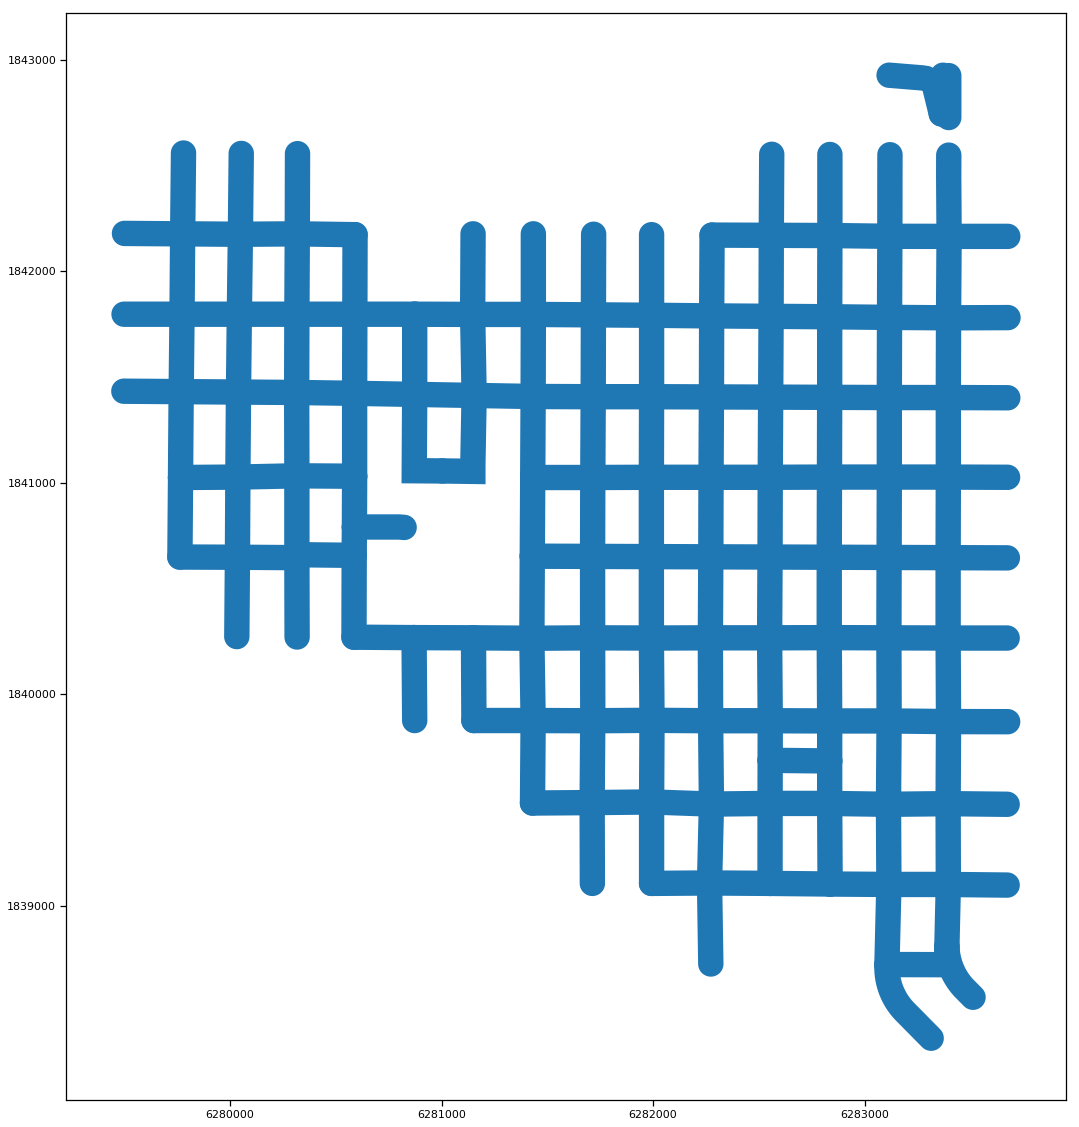

In [73]:


gt = com[com.name == 'Downtown'].copy()
gt['geometry'] = gt.buffer(-2000) # Just take the center of the dowtown area
t = gpd.sjoin(sdroads, gt)
t.plot(figsize=(20,20))


In [75]:
sdroads.to_crs({'init':'epsg:4326'}).to_csv('sdroads.csv')